<h1 align='center'><b><u>Clinical Data Analysis

### Problem Statement 1:

#### Visualization for No.of studies by each category of condition.

## Problem Statement 2:

#### Analyzing the data to get more insights from the Category "Cancers and Other Neoplasms" of studies with fields like: 
* condition 
* Age
* Gender
* Location
* Interventional

post which we can Predict cancer rate for the next 5 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
data = pd.read_csv('Cancer Analytics.csv')
print(data.shape)
data.head()

(6687, 3)


,Category,Condition,No_of_studies
0,Bacterial and Fungal Diseases,Abdominal Abscess,34
1,Bacterial and Fungal Diseases,"Abortion, Septic",3
2,Bacterial and Fungal Diseases,Abscess,213
3,Bacterial and Fungal Diseases,Acinetobacter Infections,7
4,Bacterial and Fungal Diseases,AIDS-Related Opportunistic Infections,176


In [3]:
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(428054, 6)


,Age,Gender,Conditions,Country,State,Interventions
0,"18 Years and older (Adult, Older Adult)",Female,Neoplasms,United States,New Jersey,"Drug: Aflibercept (ziv-aflibercept, AVE0005, V..."
1,"18 Years to 101 Years (Adult, Older Adult)",Female,Breast Cancers,United States,New York,Behavioral: Mindfulness based meditation program
2,"16 Years and older (Child, Adult, Older Adult)",All,Solid Tumors,United Kingdom,County Antrim,Drug: ALM201
3,"40 Years to 90 Years (Adult, Older Adult)",All,Colorectal Neoplasms,United States,California,Device: Stool Sample Collection Kit
4,"18 Years and older (Adult, Older Adult)",All,Colorectal Cancer,Netherlands,Groningen,Drug: Tivozanib (AV-951) plus FOLFOX6


### Problem Statement 1:

#### Visualization for No.of studies by each category of condition.

In [4]:
first = data[['Category', 'No_of_studies']].groupby(by='Category').sum().reset_index()
first = first.sort_values(by='No_of_studies')

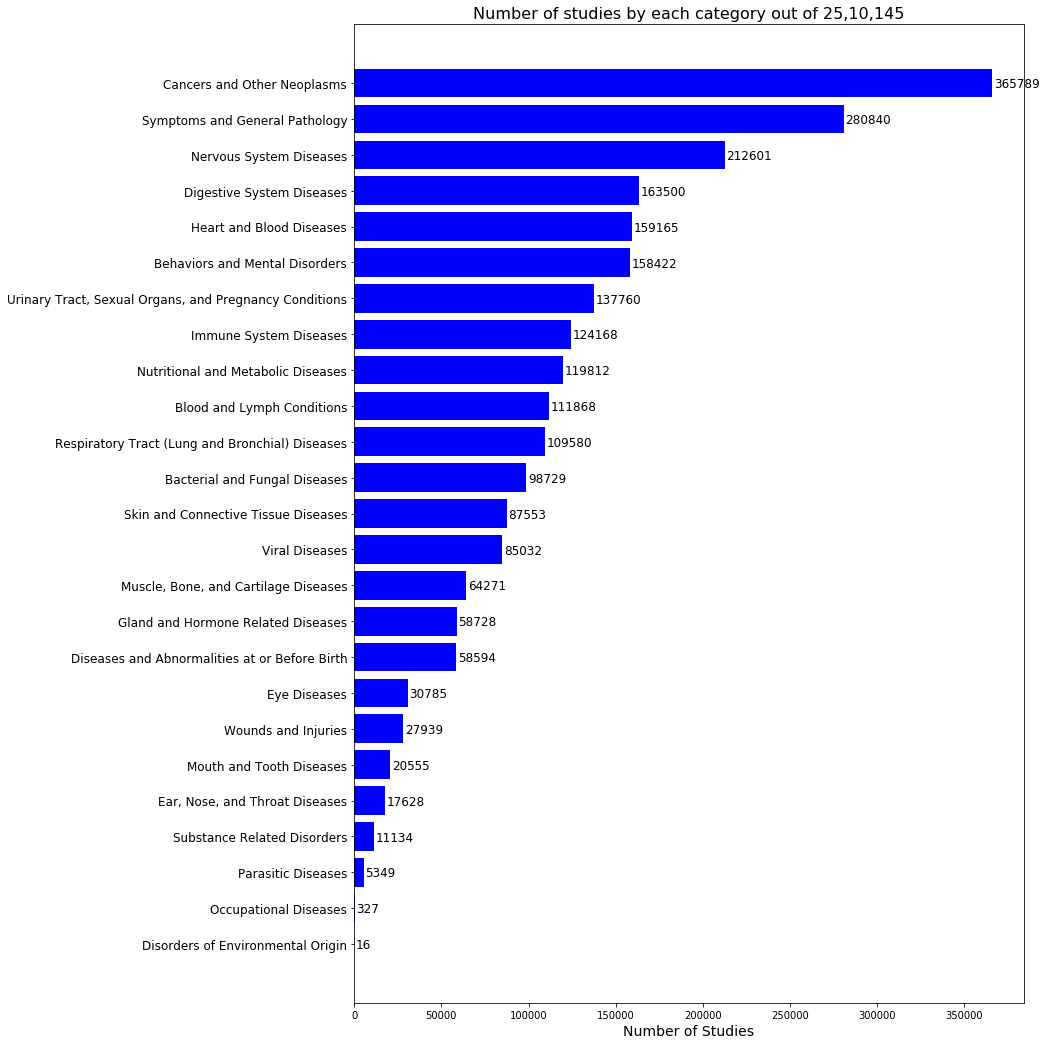

In [5]:
ind = np.arange(first.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, first.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(first.Category.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Number of studies by each category out of 25,10,145", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()


Here, we can see <b><i>"Cancers and Other Neoplasms"</i></b> has the maximum number of studies as compared to others (i.e., 3,65,789 out of 25,10,145 studies)

## Problem Statement 2:

#### Analyzing the data to get more insights from the Category "Cancers and Other Neoplasms" of studies with fields like 
* Conditions 
* Locations
* Interventions
* Gender
* Age

post which we can Predict cancer rate for the next 5 years.

### 1. Conditions/Diseases wise Analysis on "Cancers and Other Neoplasms"

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** What are top 10 conditions of ***"Cancers and Other Neoplasms"*** with maximum number of studies?
**-----------------------------------------------------------------------------------------------------------------------------

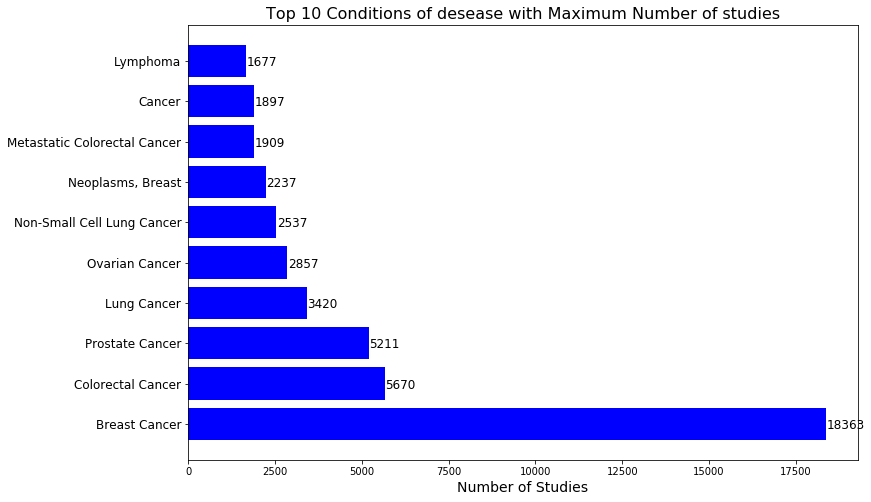

In [6]:
top_cond = df.Conditions.value_counts()[:10].reset_index()
top_cond.columns = ['Conditions', 'No_of_studies']

ind = np.arange(top_cond.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, top_cond.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(top_cond.Conditions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Conditions of desease with Maximum Number of studies", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

<b><i>"Breast Cancer"</i></b> is the disease which has maximum number of studies so we can say that <b><i>"Breast Cancer"</i></b> is the most common cancer which people are suffering. 

Let's explore the data only based on **Breast Cancer** disease

In [7]:
test = df[df.Conditions == 'Breast Cancer']

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** Which **country** is most involved in the study of ***Breast Cancer*** disease?
**-----------------------------------------------------------------------------------------------------------------------------

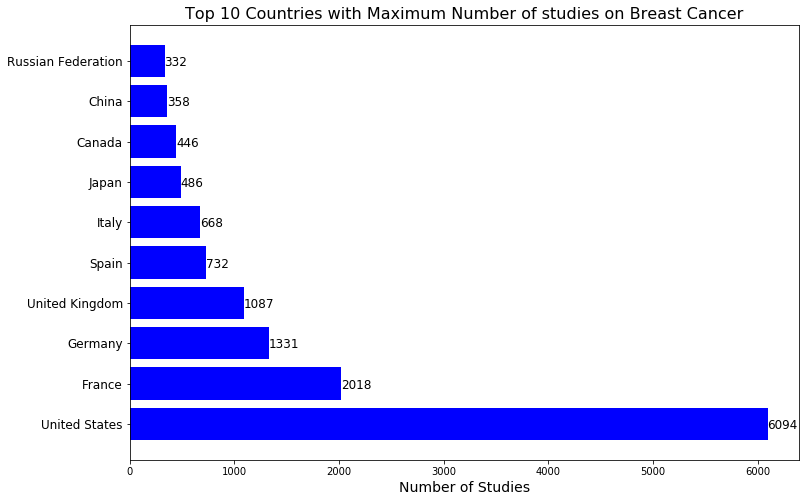

In [8]:
df1 = test.Country.value_counts().reset_index()[:10]
df1.columns = ['Country', 'No_of_studies']

ind = np.arange(df1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df1.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df1.Country.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Countries with Maximum Number of studies on Breast Cancer", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

<b><i>"United States"</i></b> is the most involving country on study of <b><i>"Breast Cancer"</i></b> disease

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** Which **State/City** of United state has maximum number of studies on ***Breast Cancer*** disease?
**-----------------------------------------------------------------------------------------------------------------------------

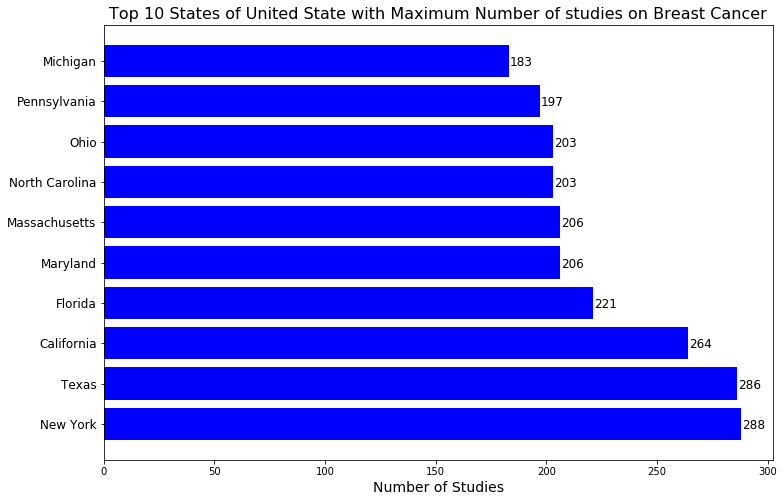

In [9]:
df2 = test[test.Country == 'United States'].State.value_counts()[:10].reset_index()
df2.columns = ['State', 'No_of_studies']

ind = np.arange(df2.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df2.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df2.State.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 States of United State with Maximum Number of studies on Breast Cancer", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

Here, **New York** city has maximum number of studies on **Breast Cancer** and after that **Texas** state

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** What are the top 10 **Age group** who are suffering from ***Breast Cancer*** disease?
**-----------------------------------------------------------------------------------------------------------------------------

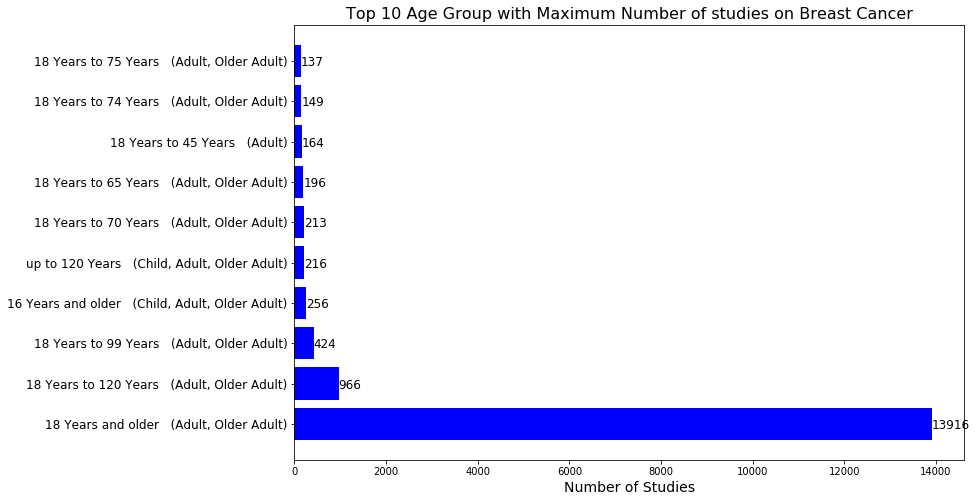

In [10]:
df3 = test.Age.value_counts().reset_index()[:11]
df3.drop(7, inplace=True)
df3.columns = ['Age', 'No_of_studies']

ind = np.arange(df3.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df3.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df3.Age.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Age Group with Maximum Number of studies on Breast Cancer", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

We can say that, starting age of ***Breast Cancer*** is 18 years and above.

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** What are the top 10 **Interventions/Treatment** used for ***Breast Cancer*** disease?
**-----------------------------------------------------------------------------------------------------------------------------

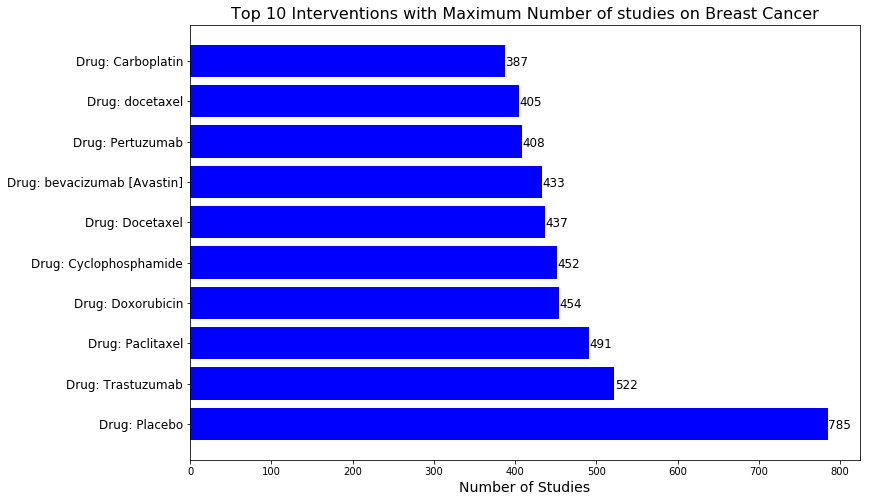

In [11]:
df4 = test.Interventions.value_counts().reset_index()[:11]
df4.drop(1, inplace=True)
df4.columns = ['Interventions', 'No_of_studies']

ind = np.arange(df4.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df4.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df4.Interventions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Interventions with Maximum Number of studies on Breast Cancer", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

We can easily conclude that most of the studies on **Breast Cancer** is focusing on Drug process.

### 2. Location wise Analysis on "Cancers and Other Neoplasms"

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** What are the top 10  **Countries** with maximum number of studies on **"Cancers and Other Neoplasms"**?
**-----------------------------------------------------------------------------------------------------------------------------

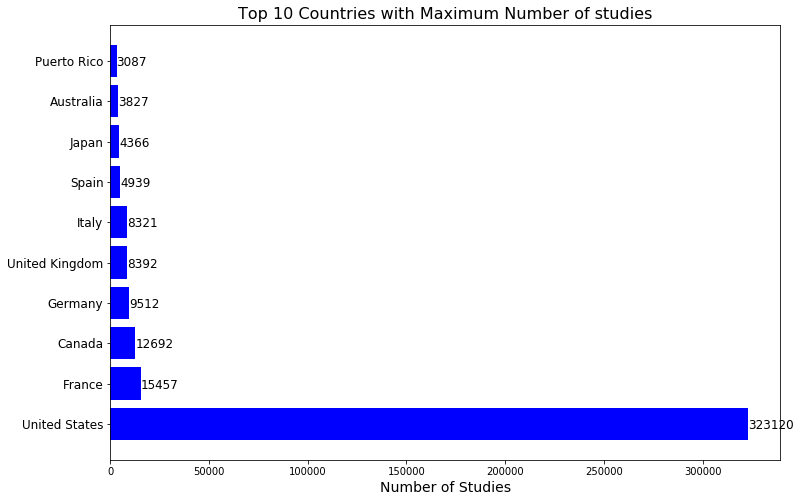

In [12]:
df5 = df.Country.value_counts().reset_index()[:10]
df5.columns = ['Country', 'No_of_studies']

ind = np.arange(df5.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df5.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df5.Country.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Countries with Maximum Number of studies", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

We have seen before, that **United state** has the maximum number of studies on **breast cancer**. And In general, <b><i>"United States"</i></b> has involved most in studies as compared to other countries.

**-----------------------------------------------------------------------------------------------------------------------------
**Question: -** Which **State** of **United States** has maximum number of studies?
**-----------------------------------------------------------------------------------------------------------------------------

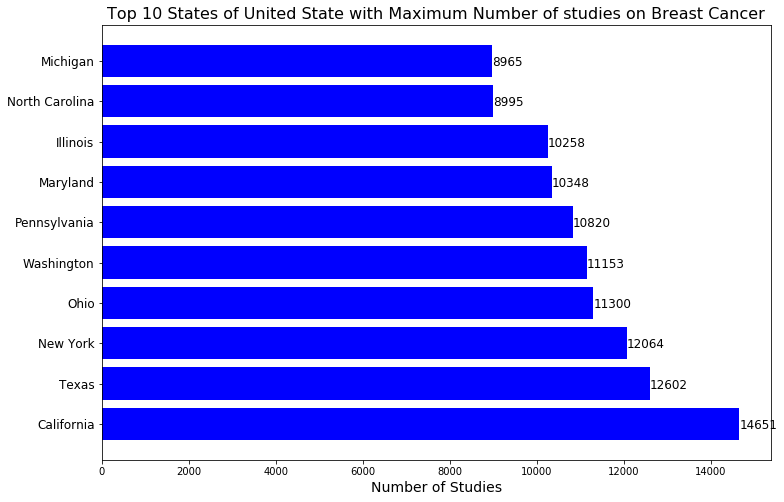

In [13]:
df6 = df[df.Country == 'United States'].State.value_counts()[:10].reset_index()
df6.columns = ['State', 'No_of_studies']

ind = np.arange(df6.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df6.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df6.State.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 States of United State with Maximum Number of studies on Breast Cancer", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

In <b><i>"United States"</i></b>, <b><i>"California"</i></b> has maximum number studies on <b><i>"Cancers and Other Neoplasm"</i></b>

### 3. Intervention wise Analysis on *"Cancers and Other Neoplasms"*

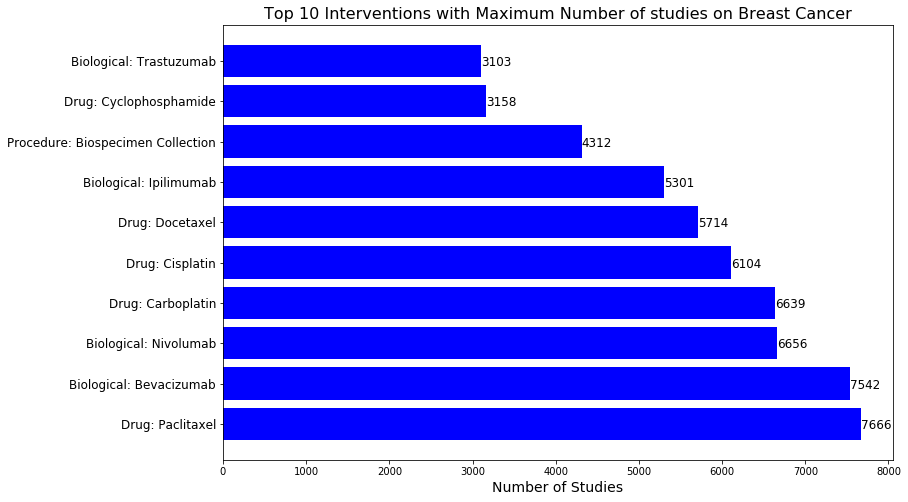

In [14]:
df7 = df.Interventions.value_counts().reset_index()[:18]
df7.drop([0,1,2,3,4,7,13,15], inplace=True)
df7.columns = ['Interventions', 'No_of_studies']

ind = np.arange(df7.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df7.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df7.Interventions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Interventions with Maximum Number of studies on Breast Cancer", fontsize=16)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show()

**Drug: Paclitaxel** is the process/treatment used for maximum number of studies on **"Cancers and Other Neoplasms"**